## Import Libraries

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load CSV Dataset

### Test Data

#### Import Train CSV

In [273]:
train_data = pd.read_csv('datasets/house_price_dataset/train.csv')
train_data.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


#### Drop Categorical Columns

In [274]:
train_data.drop(['size_units', 'lot_size_units'], axis=1, inplace=True)

In [275]:
train_data.tail()

,beds,baths,size,lot_size,zip_code,price
2011,3,2.0,1370.0,0.5,98112,910000.0
2012,1,1.0,889.0,NaN,98121,550000.0
2013,4,2.0,2140.0,6250.0,98199,1150000.0
2014,2,2.0,795.0,NaN,98103,590000.0
2015,3,2.0,1710.0,4267.0,98133,659000.0


In [276]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   beds      2016 non-null   int64  
 1   baths     2016 non-null   float64
 2   size      2016 non-null   float64
 3   lot_size  1669 non-null   float64
 4   zip_code  2016 non-null   int64  
 5   price     2016 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 94.6 KB


In [277]:
train_data.describe()

,beds,baths,size,lot_size,zip_code,price
count,2016.000000,2016.000000,2016.000000,1669.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,3871.059694,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,2719.402066,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,0.230000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,1252.000000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,4000.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,6000.000000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,9998.000000,98199.000000,2.500000e+07


In [278]:
train_data.isnull().sum()

beds          0
baths         0
size          0
lot_size    347
zip_code      0
price         0
dtype: int64

#### Fill NaN values

In [279]:
# train_data['lot_size'].fillna(np.random.uniform(1000, 9999, 1)[0], inplace=True)
train_data['lot_size'].fillna(0, inplace=True)

In [280]:
test_data.isnull().sum()

beds        0
baths       0
size        0
lot_size    0
zip_code    0
price       0
dtype: int64

In [281]:
train_data.columns

Index(['beds', 'baths', 'size', 'lot_size', 'zip_code', 'price'], dtype='object')

#### EDA(Exploratory Data Analysis)

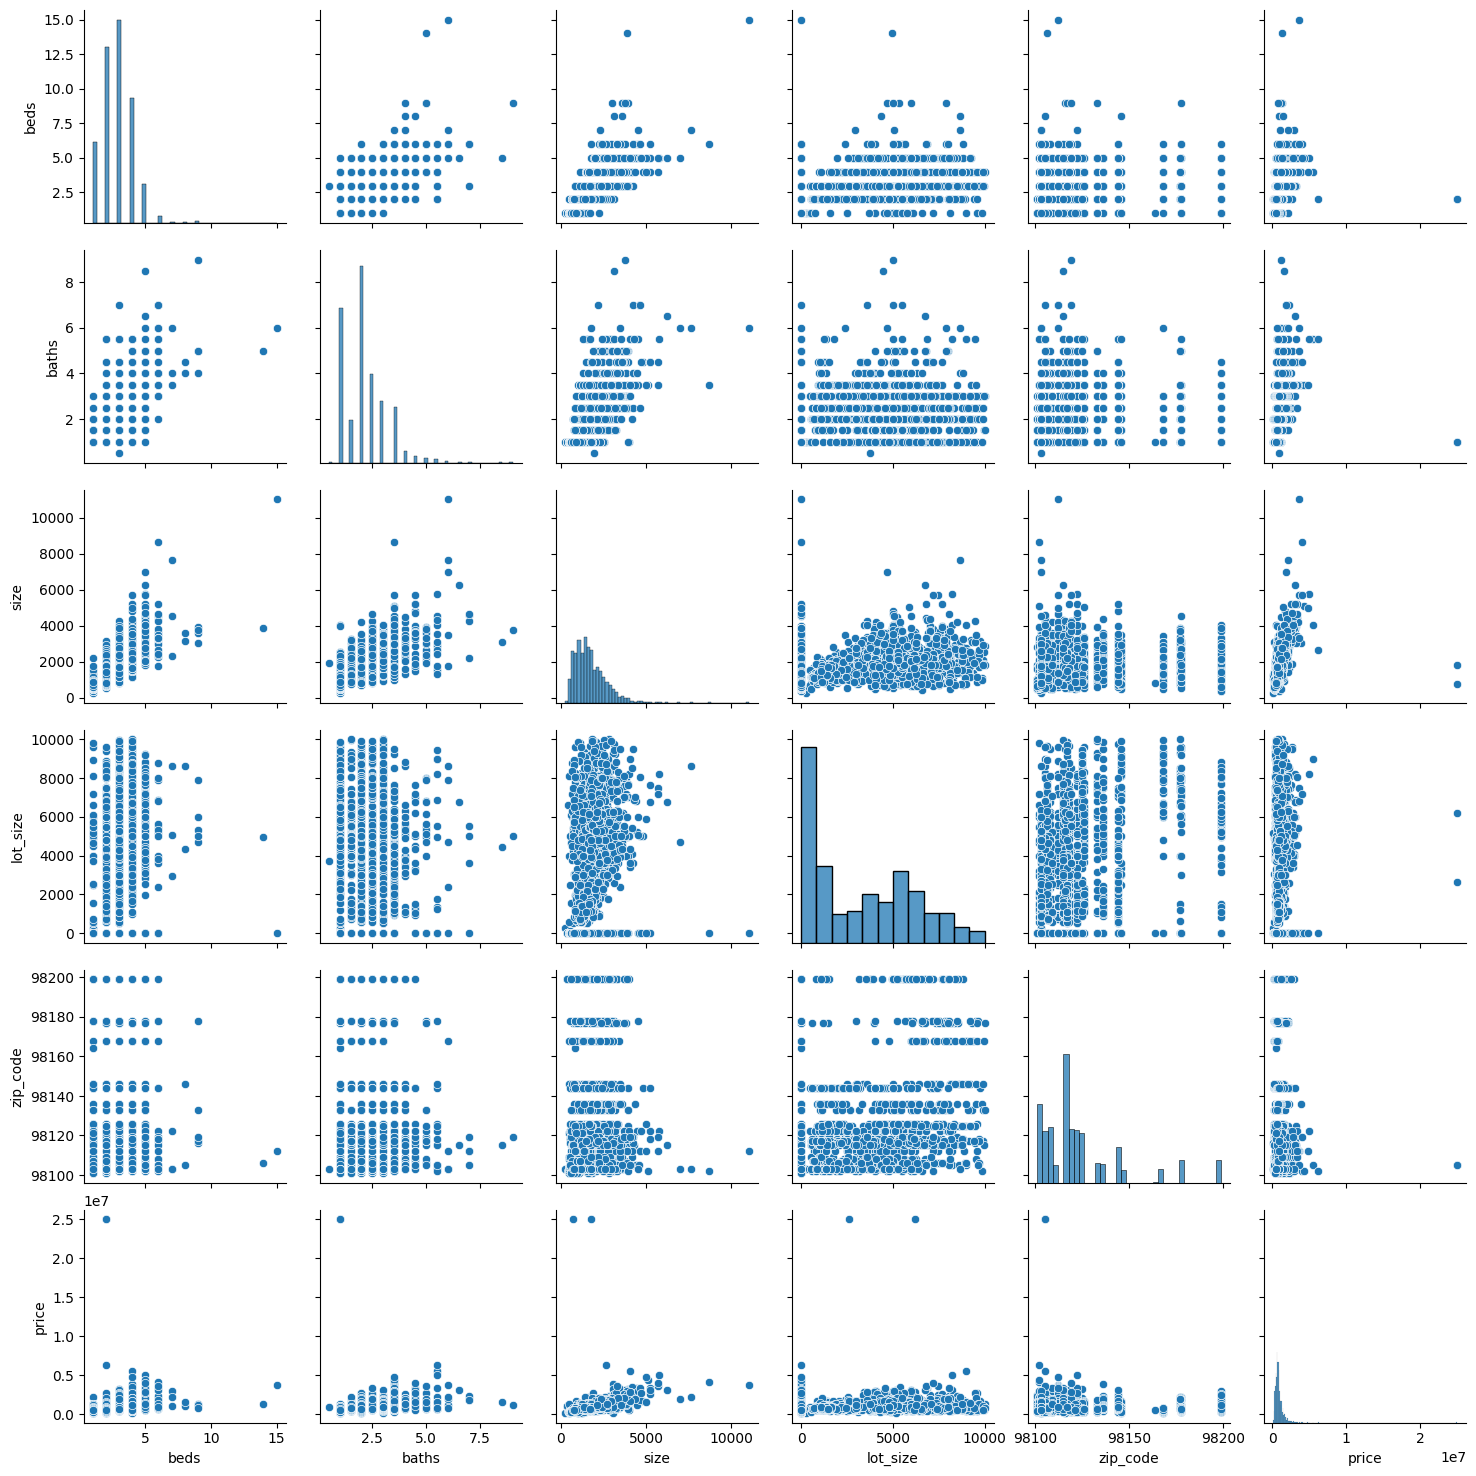

In [282]:
sns.pairplot(train_data)

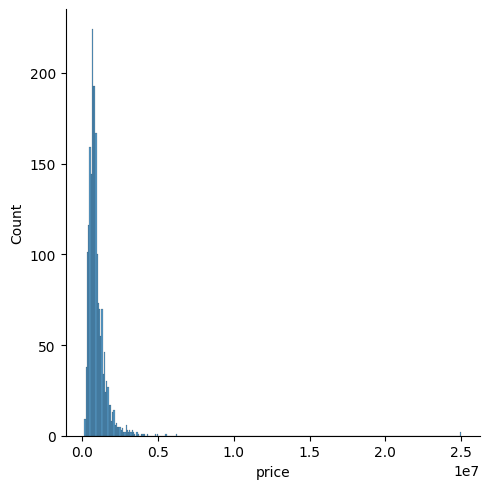

In [283]:
sns.displot(train_data['price'])

<AxesSubplot: >

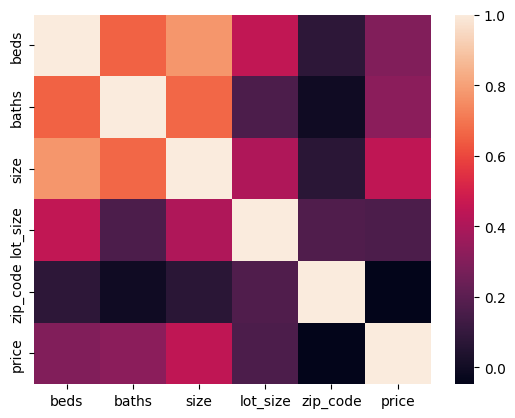

In [284]:
sns.heatmap(train_data.corr())

In [285]:
train_data

,beds,baths,size,lot_size,zip_code,price
0,3,2.5,2590.0,6000.00,98144,795000.0
1,4,2.0,2240.0,0.31,98106,915000.0
2,4,3.0,2040.0,3783.00,98107,950000.0
3,4,3.0,3800.0,5175.00,98199,1950000.0
4,2,2.0,1042.0,0.00,98102,950000.0
...,...,...,...,...,...,...
2011,3,2.0,1370.0,0.50,98112,910000.0
2012,1,1.0,889.0,0.00,98121,550000.0
2013,4,2.0,2140.0,6250.00,98199,1150000.0
2014,2,2.0,795.0,0.00,98103,590000.0


#### Split testing data

In [286]:
y_train = train_data['price']
y_train.head()

0     795000.0
1     915000.0
2     950000.0
3    1950000.0
4     950000.0
Name: price, dtype: float64

In [287]:
X_train = train_data.iloc[:, :-1]
X_train.head()

,beds,baths,size,lot_size,zip_code
0,3,2.5,2590.0,6000.00,98144
1,4,2.0,2240.0,0.31,98106
2,4,3.0,2040.0,3783.00,98107
3,4,3.0,3800.0,5175.00,98199
4,2,2.0,1042.0,0.00,98102


### Test Data

#### Import CSV

In [288]:
test_data = pd.read_csv('datasets/house_price_dataset/test.csv')
test_data.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0


#### Drop Categorical Columns

In [289]:
test_data.drop(['size_units', 'lot_size_units'], axis=1, inplace=True)

In [290]:
test_data.head()

,beds,baths,size,lot_size,zip_code,price
0,3,3.0,2850.0,4200.00,98119,1175000.0
1,4,5.0,3040.0,5002.00,98106,1057500.0
2,3,1.0,1290.0,6048.00,98125,799000.0
3,3,2.0,2360.0,0.28,98188,565000.0
4,3,3.5,1942.0,1603.00,98107,1187000.0


In [291]:
test_data.tail()

,beds,baths,size,lot_size,zip_code,price
500,5,4.5,5580.0,0.30,98146,3800000.0
501,3,2.5,1390.0,1570.00,98126,575000.0
502,3,2.5,2950.0,0.47,98118,3105000.0
503,5,5.0,3010.0,4887.00,98115,1807000.0
504,3,2.0,1301.0,3000.00,98103,895000.0


In [292]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   beds      505 non-null    int64  
 1   baths     505 non-null    float64
 2   size      505 non-null    float64
 3   lot_size  428 non-null    float64
 4   zip_code  505 non-null    int64  
 5   price     505 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 23.8 KB


In [293]:
test_data.describe()

,beds,baths,size,lot_size,zip_code,price
count,505.000000,505.000000,505.000000,428.000000,505.000000,5.050000e+02
mean,2.954455,2.219802,1851.843564,3994.459813,98125.366337,9.795822e+05
std,1.214947,1.013404,922.556090,2696.962024,24.875054,6.084759e+05
min,1.000000,1.000000,376.000000,0.230000,98101.000000,1.700000e+05
25%,2.000000,1.500000,1171.000000,1326.500000,98108.000000,6.199900e+05
50%,3.000000,2.000000,1690.000000,4190.000000,98118.000000,8.400000e+05
75%,4.000000,2.500000,2400.000000,6000.000000,98126.000000,1.155000e+06
max,9.000000,7.000000,6139.000000,9974.000000,98199.000000,6.250000e+06


In [294]:
test_data.isnull().sum()

beds         0
baths        0
size         0
lot_size    77
zip_code     0
price        0
dtype: int64

#### Fill NaN values

In [295]:
test_data['lot_size'].fillna(0, inplace=True)

#### EDA(Exploratory Data Analysis)

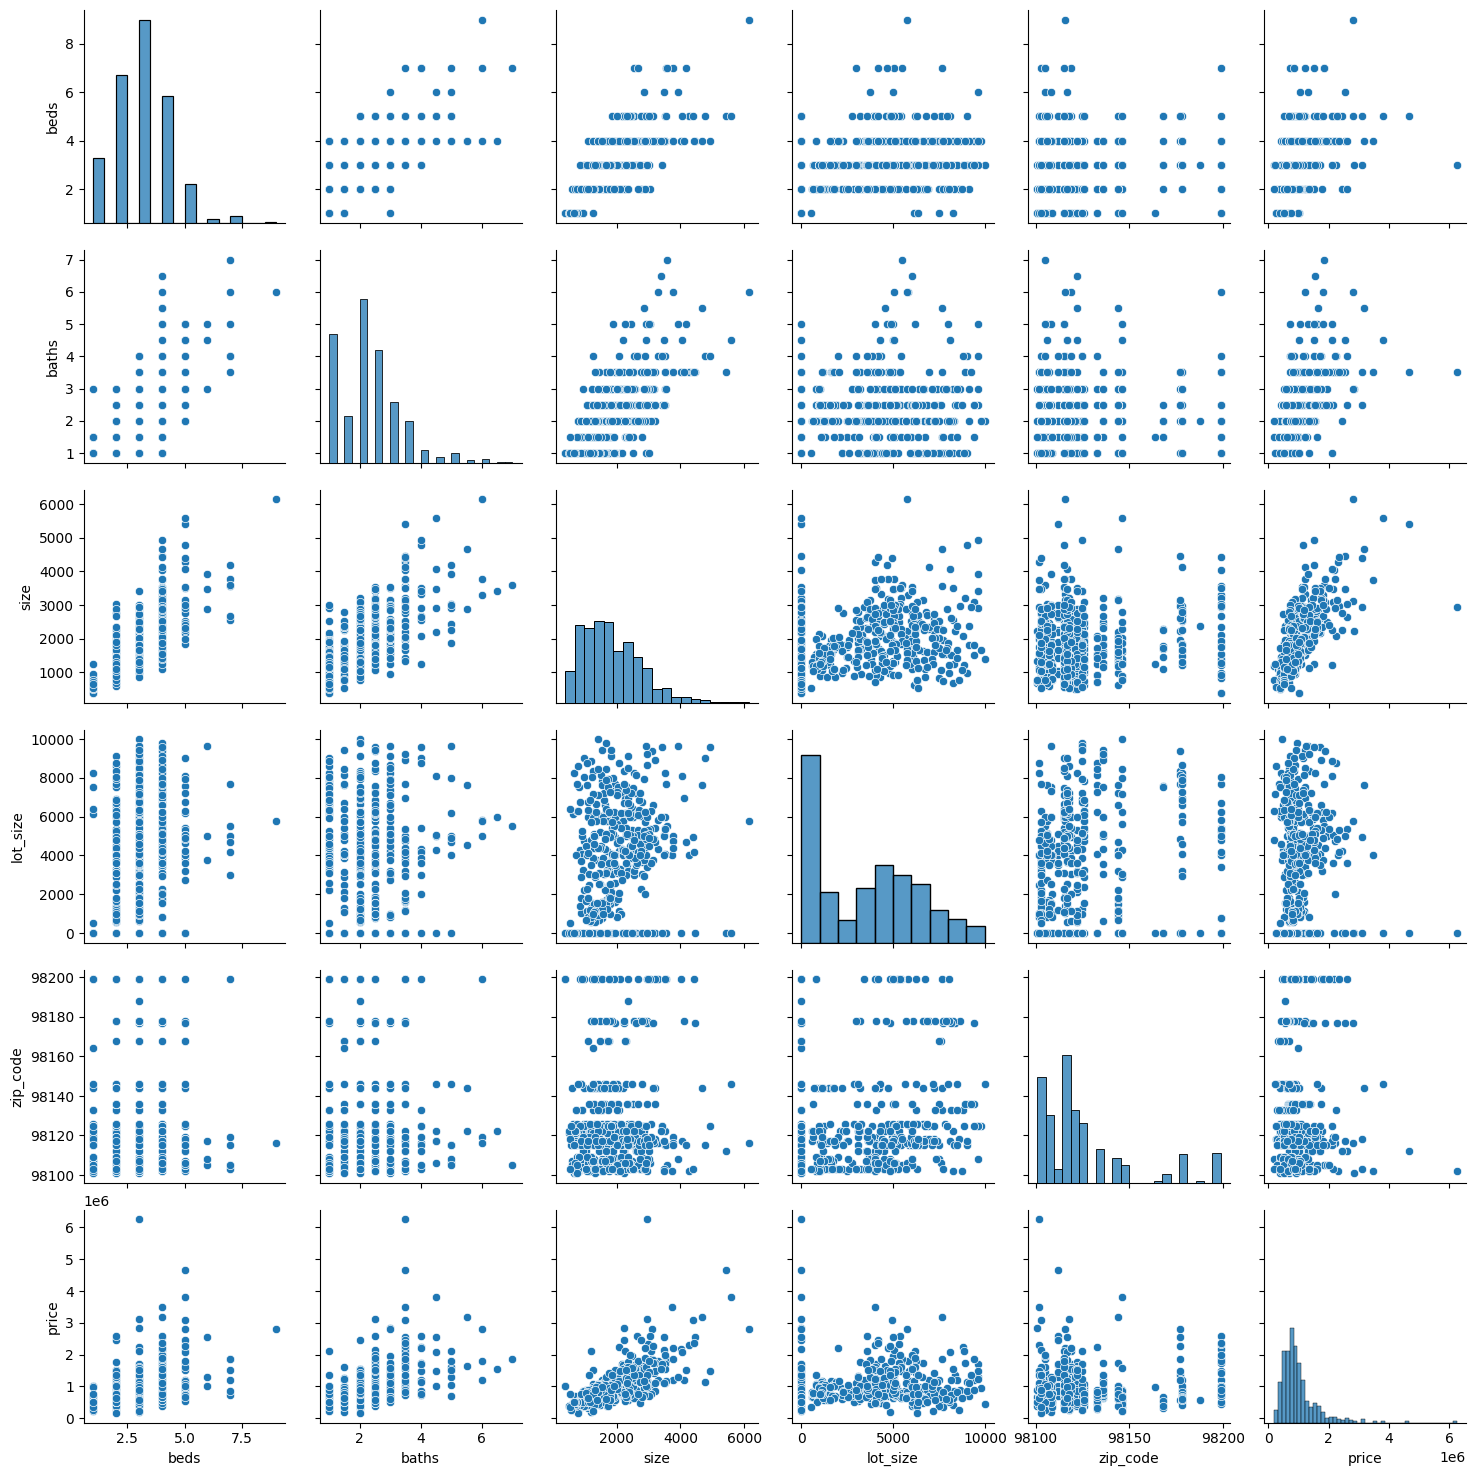

In [296]:
sns.pairplot(test_data)

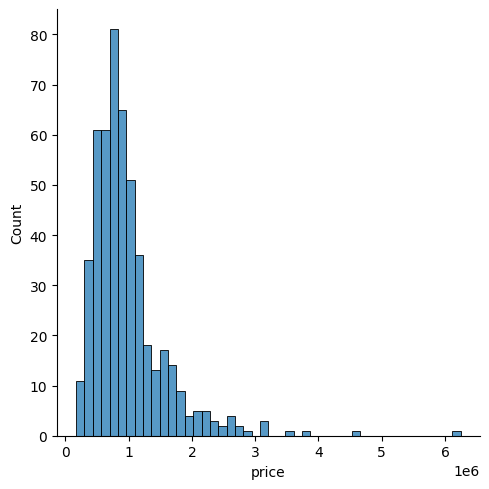

In [297]:
sns.displot(test_data['price'])

<AxesSubplot: >

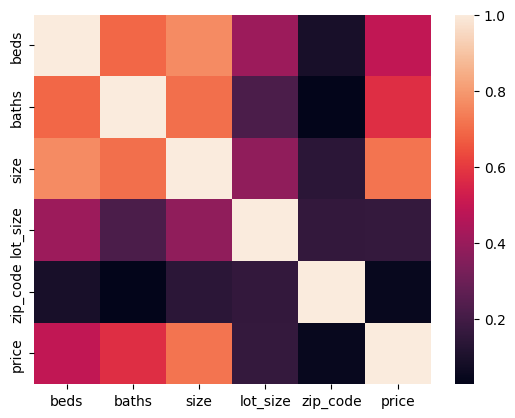

In [298]:
sns.heatmap(test_data.corr())

#### Split testing data

In [299]:
y_test = test_data['price']
y_test.head()

0    1175000.0
1    1057500.0
2     799000.0
3     565000.0
4    1187000.0
Name: price, dtype: float64

In [300]:
X_test = test_data.iloc[:, :-1]
X_test.head()

,beds,baths,size,lot_size,zip_code
0,3,3.0,2850.0,4200.00,98119
1,4,5.0,3040.0,5002.00,98106
2,3,1.0,1290.0,6048.00,98125
3,3,2.0,2360.0,0.28,98188
4,3,3.5,1942.0,1603.00,98107


### Split Data in traning & testing

In [301]:
# from sklearn.model_selection import train_test_split

In [302]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [303]:
X_train.shape

(2016, 5)

In [304]:
y_train.shape

(2016,)

In [305]:
X_test.shape

(505, 5)

In [306]:
y_test.shape

(505,)

In [307]:
from sklearn.linear_model import LinearRegression

In [308]:
lm = LinearRegression()

In [309]:
lm.fit(X_train, y_train)

LinearRegression()

## Predictions

In [310]:
predictions = lm.predict(X_test)

In [311]:
predictions.shape

(505,)

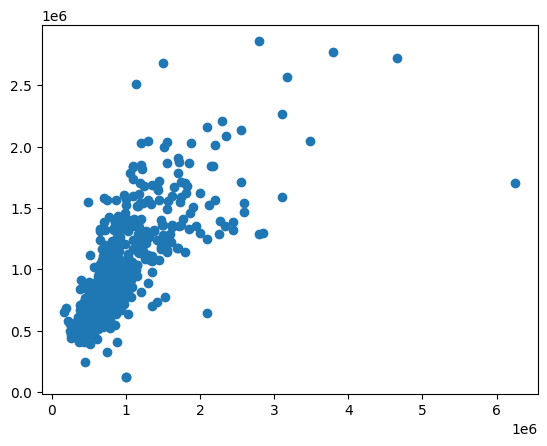

In [312]:
plt.scatter(y_test, predictions)

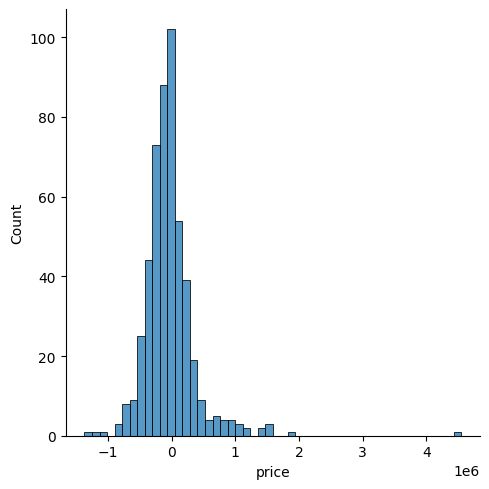

In [313]:
sns.displot((y_test-predictions), bins=50)

## Model R2 Score

In [314]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [315]:
score=r2_score(y_test, predictions)
print('r2 socre is: ', score)
print('mean_sqrd_error is: ', mean_squared_error(y_test, predictions))
print('root_mean_squared error of is:', np.sqrt(mean_squared_error(y_test, predictions)))

r2 socre is:  0.5191998187255684
mean_sqrd_error is:  177660359630.171
root_mean_squared error of is: 421497.7575624466


## Visualize Predictions

In [316]:
df = pd.DataFrame({'Actual': y_test, 'Predictions': predictions})
df

,Actual,Predictions
0,1175000.0,1.609551e+06
1,1057500.0,1.782979e+06
2,799000.0,6.590588e+05
3,565000.0,1.022465e+06
4,1187000.0,1.184957e+06
...,...,...
500,3800000.0,2.771138e+06
501,575000.0,7.673644e+05
502,3105000.0,1.585915e+06
503,1807000.0,1.621837e+06
